# **Data Preprocessing Project**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset and rename columns for clarity
data = pd.read_csv('data/heart_disease.csv')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease']

**Drop Duplicates, Handle Missing Values, and Remove Outliers**

In [3]:
# Drop the 'disease' column as it's the target variable for prediction
data = data.drop(['disease'], axis=1)

# Print the shape of the dataset to understand its dimensions
print(f'Number of instances = {{data.shape[0]}}')  # Number of rows
print(f'Number of attributes = {{data.shape[1]}}')  # Number of columns
print(data.head())  # Display the first few rows for a quick overview

Number of instances = {data.shape[0]}
Number of attributes = {data.shape[1]}
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   slope ca thal  
0    2.0  3    3  
1    2.0  2    7  
2    3.0  0    3  
3    1.0  0    3  
4    1.0  0    3  


In [4]:
# **Modularization: Created a function for duplicate removal**
def remove_duplicates(df):
    dups = df.duplicated()
    print(f'Number of duplicate rows = {{dups.sum()}}')  # Count duplicates
    df_cleaned = df.drop_duplicates()
    print(f'Number of instances after dropping duplicates = {{df_cleaned.shape[0]}}')  # New row count
    return df_cleaned

In [5]:
# Remove duplicates from the dataset
data2 = remove_duplicates(data)

# Replace '?' with NaN to handle missing values properly
data3 = data2.replace('?', np.nan)

Number of duplicate rows = {dups.sum()}
Number of instances after dropping duplicates = {df_cleaned.shape[0]}


In [6]:
# **Handle missing values**
def handle_missing_values(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    print('Replace missing values with median')
    for col in df.columns:
        df[col] = df[col].fillna(df[col].median())  # No inplace, reassign the column directly
    return df

# Handle missing values in the dataset
data3 = handle_missing_values(data3)

Replace missing values with median


In [7]:
# **Visualize missing values**
def visualize_missing_values(df):
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        missing_values.plot(kind='bar', figsize=(10, 5))  # Plot only columns with missing values
        plt.title('Missing Values Count')  # Title for the plot
        plt.xlabel('Features')  # X-axis label
        plt.ylabel('Count')  # Y-axis label
        plt.show()  # Display the plot
    else:
        print("No missing values to visualize.")

# Visualize missing values after handling missing data
visualize_missing_values(data3)

No missing values to visualize.


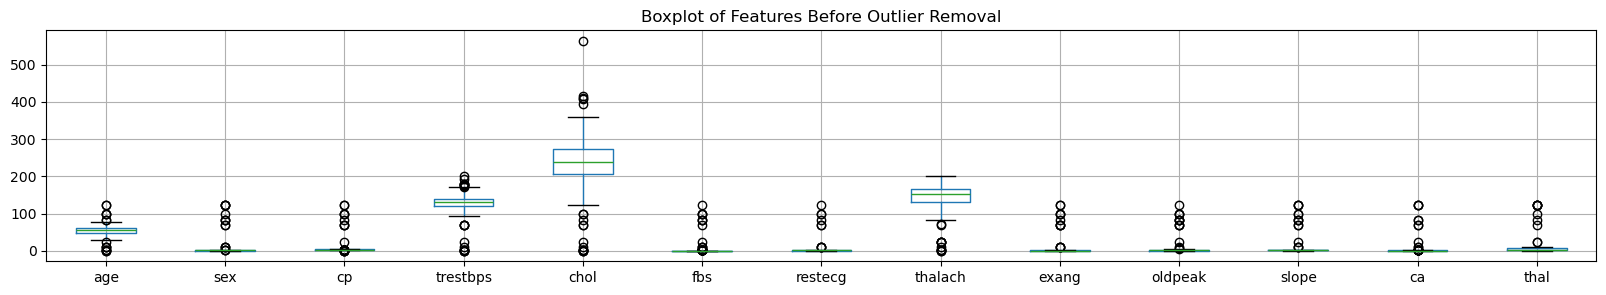

In [8]:
# **Visualizing potential outliers using boxplots**
data3.boxplot(figsize=(20, 3))  # Initial boxplot for visual inspection
plt.title('Boxplot of Features Before Outlier Removal')
plt.show()  # Display the boxplot

In [20]:
# **Remove outliers**
def remove_outliers(df):
    Z = (df - df.mean()) / df.std()  # Z-score normalization
    print(f'Number of rows before removing outliers = {{Z.shape[0]}}')  # Initial row count
    Z2 = df.loc[((Z > -3).sum(axis=1) == len(df.columns)) & ((Z <= 3).sum(axis=1) == len(df.columns)), :]
    print(f'Number of rows after removing outliers = {{Z2.shape[0]}}')  # Count after outlier removal
    return Z2

# Remove outliers from the dataset
data3 = remove_outliers(data3)

Number of rows before removing outliers = {Z.shape[0]}
Number of rows after removing outliers = {Z2.shape[0]}


**One hot Encoding and Feature Scaling on the Dataset**

In [10]:
def encode_categorical(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # Label encode binary categorical columns
    df['sex'] = le.fit_transform(df['sex'])
    df['fbs'] = le.fit_transform(df['fbs'])
    df['exang'] = le.fit_transform(df['exang'])
    
    # One-Hot encode multiclass columns
    df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])
    return df

# Encode categorical variables
data3 = encode_categorical(data3)

In [11]:
# **Feature scaling**
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data3_scaled = pd.DataFrame(scaler.fit_transform(data3), columns=data3.columns)

In [12]:
# **Visualize cleaned data**
def visualize_data(df):
    df.boxplot(figsize=(20, 3))  # Size of the plot
    plt.title('Boxplot of Features After Cleaning and Scaling')
    plt.show()

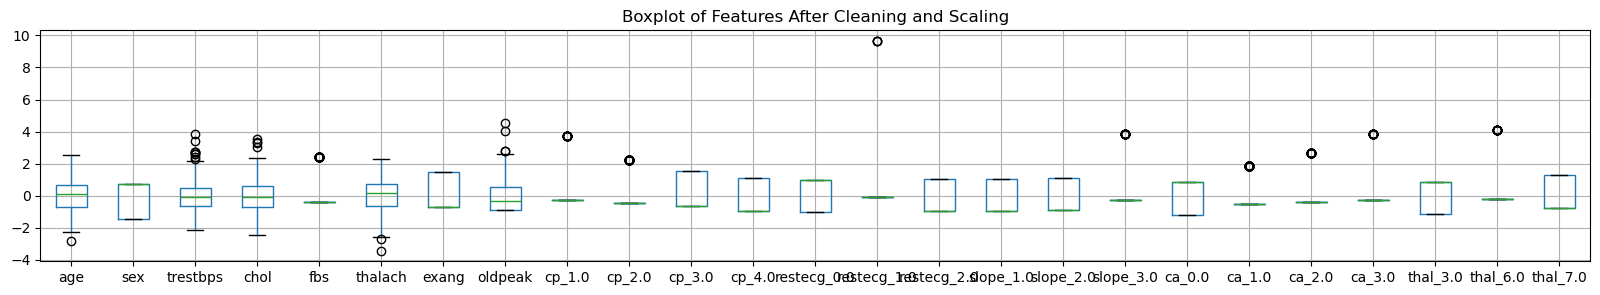

In [13]:
# Visualize the cleaned dataset
visualize_data(data3_scaled)

**Split the Dataset 80% train, 20% test**

In [14]:
# **Split dataset**
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80-20 split)
train_data, test_data = train_test_split(data3_scaled, test_size=0.2, random_state=42)

# **Calculate mean and standard deviation for both sets**
train_mean = train_data.mean()
train_std = train_data.std()

test_mean = test_data.mean()
test_std = test_data.std()

In [15]:
# Display the mean and standard deviation for training and test sets
print(f'Train Mean:\n{train_mean}')
print(f'Train Std:\n{train_std}')
print(f'Test Mean:\n{test_mean}')
print(f'Test Std:\n{test_std}')

Train Mean:
age            0.016277
sex           -0.004375
trestbps      -0.002095
chol          -0.005001
fbs            0.067379
thalach        0.012813
exang         -0.016388
oldpeak       -0.011330
cp_1.0        -0.003290
cp_2.0        -0.013588
cp_3.0         0.045123
cp_4.0        -0.029189
restecg_0.0    0.069623
restecg_1.0    0.025945
restecg_2.0   -0.074967
slope_1.0     -0.009757
slope_2.0     -0.004478
slope_3.0      0.029158
ca_0.0        -0.002525
ca_1.0        -0.003771
ca_2.0         0.000330
ca_3.0         0.011078
thal_3.0      -0.029266
thal_6.0       0.004036
thal_7.0       0.028052
dtype: float64
Train Std:
age            0.995279
sex            1.003849
trestbps       0.985334
chol           1.003642
fbs            1.064952
thalach        0.970114
exang          0.995734
oldpeak        0.986962
cp_1.0         0.996472
cp_2.0         0.990243
cp_3.0         1.021658
cp_4.0         0.999923
restecg_0.0    0.998792
restecg_1.0    1.119495
restecg_2.0    0.996732
sl

**Comparing the training and test values**

In [16]:
# Compare the difference between train and test means
mean_diff = abs(train_mean - test_mean)
std_diff = abs(train_std - test_std)

In [17]:
print(f'Mean Differences Between Train and Test:\n{mean_diff}\n')
print(f'Standard Deviation Differences Between Train and Test:\n{std_diff}\n')

Mean Differences Between Train and Test:
age            0.081099
sex            0.021800
trestbps       0.010438
chol           0.024916
fbs            0.335714
thalach        0.063841
exang          0.081652
oldpeak        0.056452
cp_1.0         0.016394
cp_2.0         0.067704
cp_3.0         0.224823
cp_4.0         0.145435
restecg_0.0    0.346893
restecg_1.0    0.129271
restecg_2.0    0.373522
slope_1.0      0.048613
slope_2.0      0.022314
slope_3.0      0.145280
ca_0.0         0.012578
ca_1.0         0.018788
ca_2.0         0.001646
ca_3.0         0.055194
thal_3.0       0.145819
thal_6.0       0.020111
thal_7.0       0.139769
dtype: float64

Standard Deviation Differences Between Train and Test:
age            0.038347
sex            0.001749
trestbps       0.088508
chol           0.000768
fbs            0.430335
thalach        0.156836
exang          0.036085
oldpeak        0.079656
cp_1.0         0.034995
cp_2.0         0.063489
cp_3.0         0.117287
cp_4.0         0.009598


In [18]:
# Summarize the differences
if mean_diff.mean() < 0.1 and std_diff.mean() < 0.1:
    print("The training and test sets are well-balanced and represent similar distributions.")
else:
    print("There are some differences between the training and test sets. Further analysis might be required.")

There are some differences between the training and test sets. Further analysis might be required.
